In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)
import torchvision
import torchvision.transforms as transforms

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [3]:
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=1000
    ,shuffle=True
)

In [4]:
len(train_set)

60000

In [5]:
sample = next(iter(train_set))

In [6]:
sample[0].shape

torch.Size([1, 28, 28])

In [7]:
image, label = sample

In [8]:
type(image)

torch.Tensor

In [9]:
type(label)

int

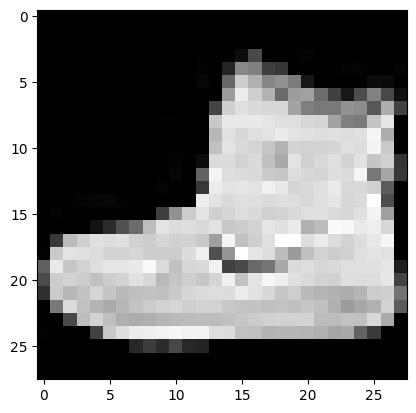

In [10]:
plt.imshow(image.squeeze(), cmap="gray")

In [11]:
display_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10)

In [12]:
batch = next(iter(display_loader))

In [13]:
images, labels = batch

In [14]:
grid = torchvision.utils.make_grid(images, nrow=10)

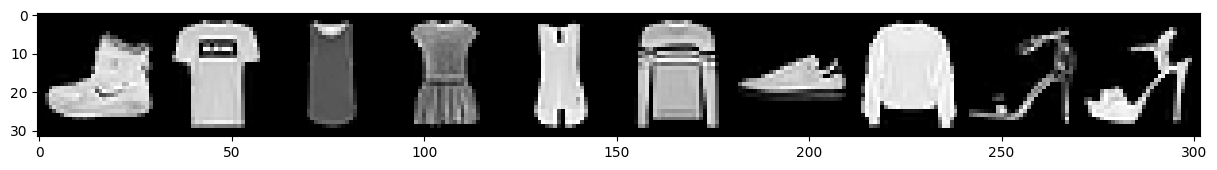

In [15]:
plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

In [16]:
print('labels:', labels)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


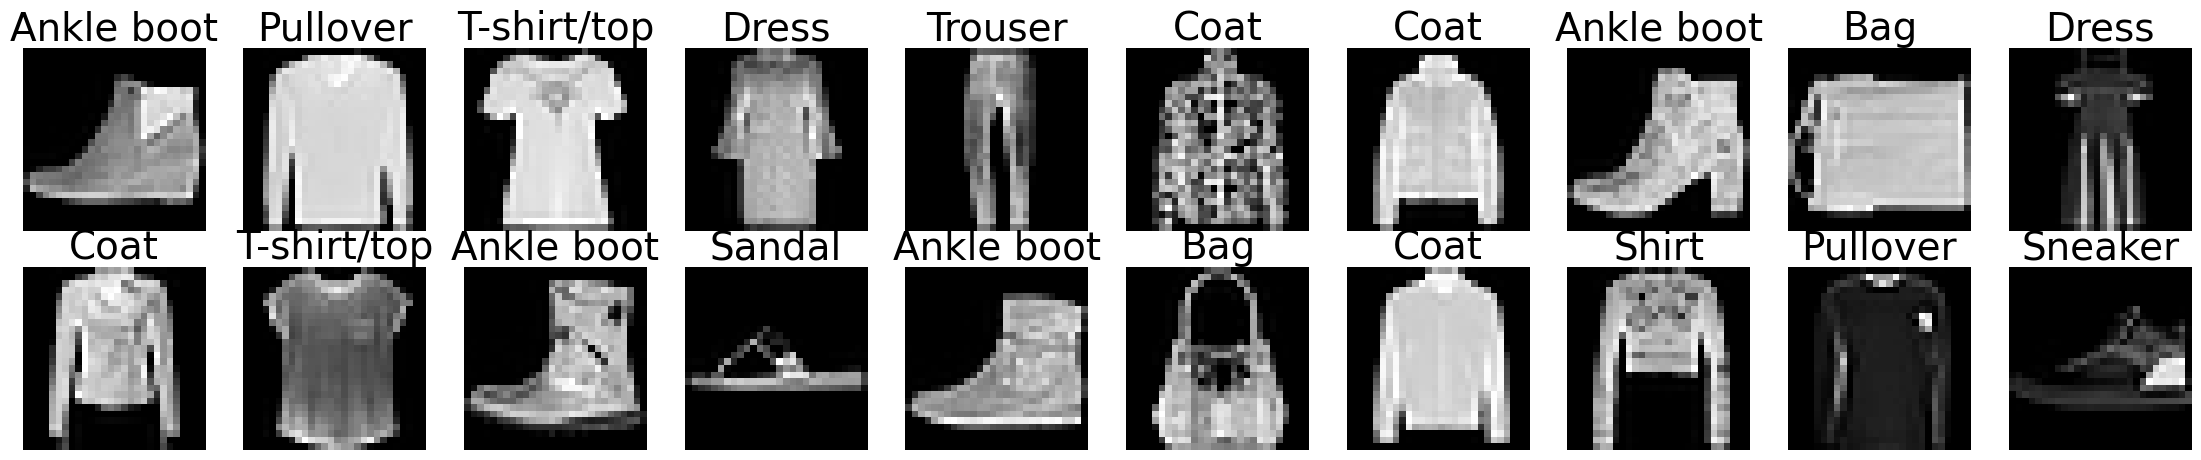

In [17]:
how_many_to_plot = 20

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

plt.figure(figsize=(28,28))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()

In [18]:
import torch.nn as nn

In [19]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)

        return t

In [21]:
network = Network()

In [22]:
sample = next(iter(train_set)) 
image, label = sample 
image.shape 

torch.Size([1, 28, 28])

In [23]:
pred = network(image.unsqueeze(0))

In [24]:
pred

tensor([[ 0.0391,  0.0572, -0.0874,  0.0125,  0.0545,  0.1299, -0.0881, -0.1316, -0.0374,  0.0629]])

In [25]:
pred.argmax(dim=1)

tensor([5])

In [26]:
F.softmax(pred, dim=1)

tensor([[0.1035, 0.1054, 0.0912, 0.1008, 0.1051, 0.1134, 0.0912, 0.0873, 0.0959, 0.1060]])

In [27]:
F.softmax(pred, dim=1).sum()

tensor(1.)

In [28]:
net2 = Network()
net2(image.unsqueeze(0))

tensor([[ 0.0453, -0.1005, -0.0023, -0.1408, -0.0223, -0.1060, -0.0167,  0.0638, -0.1198, -0.0901]])

In [29]:
data_loader = torch.utils.data.DataLoader(
     train_set, batch_size=10
)

In [30]:
batch = next(iter(data_loader))

In [31]:
images, labels = batch

In [32]:
images.shape

torch.Size([10, 1, 28, 28])

In [33]:
preds = network(images)
preds


tensor([[ 0.0391,  0.0572, -0.0874,  0.0125,  0.0545,  0.1299, -0.0881, -0.1316, -0.0374,  0.0629],
        [ 0.0480,  0.0581, -0.0883,  0.0160,  0.0429,  0.1482, -0.0900, -0.1329, -0.0314,  0.0682],
        [ 0.0502,  0.0576, -0.0792,  0.0175,  0.0517,  0.1365, -0.0848, -0.1319, -0.0298,  0.0644],
        [ 0.0437,  0.0586, -0.0880,  0.0181,  0.0486,  0.1372, -0.0865, -0.1331, -0.0288,  0.0678],
        [ 0.0426,  0.0565, -0.0939,  0.0084,  0.0475,  0.1401, -0.1003, -0.1288, -0.0337,  0.0638],
        [ 0.0481,  0.0602, -0.0905,  0.0153,  0.0461,  0.1431, -0.0896, -0.1298, -0.0267,  0.0655],
        [ 0.0389,  0.0627, -0.0986,  0.0165,  0.0533,  0.1259, -0.0883, -0.1202, -0.0364,  0.0636],
        [ 0.0443,  0.0590, -0.0907,  0.0126,  0.0427,  0.1407, -0.0942, -0.1284, -0.0333,  0.0637],
        [ 0.0395,  0.0609, -0.0988,  0.0154,  0.0548,  0.1386, -0.0870, -0.1262, -0.0207,  0.0787],
        [ 0.0456,  0.0614, -0.1050,  0.0170,  0.0464,  0.1376, -0.0934, -0.1266, -0.0226,  0.0694]])

In [36]:
preds.argmax(dim=1)

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [35]:
labels


tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [37]:
preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False, False, False, False,  True,  True])

In [38]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [39]:
get_num_correct(preds, labels)

2

In [43]:
loss = F.cross_entropy(preds, labels)
loss.item()


2.289224147796631

In [44]:
loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [46]:
torch.set_grad_enabled(True)

In [47]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) # Get Batch
images, labels = batch

preds = network(images) # Pass Batch
loss = F.cross_entropy(preds, labels) # Calculate Loss

loss.backward() # Calculate Gradients
optimizer.step() # Update Weights

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.2895946502685547
loss2: 2.243748426437378


In [49]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0

for batch in train_loader: # Get Batch
    images, labels = batch 

    preds = network(images) # Pass Batch
    loss = F.cross_entropy(preds, labels) # Calculate Loss

    optimizer.zero_grad()
    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

print(
    "epoch:", 0, 
    "total_correct:", total_correct, 
    "loss:", total_loss
)

epoch: 0 total_correct: 47253 loss: 336.13565042614937


In [51]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

In [60]:
for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

epoch 0 total_correct: 54143 loss: 157.95229174941778
epoch 1 total_correct: 54152 loss: 157.64724074304104
epoch 2 total_correct: 54091 loss: 161.8991296440363
epoch 3 total_correct: 54108 loss: 160.14537367224693
epoch 4 total_correct: 54423 loss: 153.99988066405058
epoch 5 total_correct: 54187 loss: 159.59254541248083
epoch 6 total_correct: 54268 loss: 158.45882435888052
epoch 7 total_correct: 54356 loss: 156.78722876310349
epoch 8 total_correct: 54161 loss: 160.6100741699338
epoch 9 total_correct: 54289 loss: 156.38091652095318


In [54]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

In [61]:
prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
train_preds = get_all_preds(network, prediction_loader)

In [62]:
preds_correct = get_num_correct(train_preds, train_set.targets)

In [63]:
print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))


total correct: 53055
accuracy: 0.88425


In [64]:
stacked = torch.stack(
    (
        train_set.targets
        ,train_preds.argmax(dim=1)
    )
    ,dim=1
)

In [65]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [66]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
print(type(cm))
cm

<class 'numpy.ndarray'>


array([[5646,    7,  112,   73,   13,    2,  128,    0,   19,    0],
       [  12, 5924,    3,   43,    1,    0,    7,    0,   10,    0],
       [ 125,    0, 5110,   26,  448,    0,  253,    0,   38,    0],
       [ 205,  101,   46, 5389,  141,    0,  101,    0,   17,    0],
       [   8,   11,  846,  238, 4589,    0,  296,    0,   12,    0],
       [   0,    0,    2,    0,    0, 5837,    2,  102,   30,   27],
       [1529,    7,  786,  104,  410,    0, 3113,    0,   51,    0],
       [   0,    0,    0,    0,    0,   36,    0, 5844,    3,  117],
       [  23,    8,   46,   12,   18,    4,   71,    4, 5814,    0],
       [   0,    0,    1,    1,    0,   13,    1,  184,   11, 5789]])

Confusion matrix, without normalization
[[5646    7  112   73   13    2  128    0   19    0]
 [  12 5924    3   43    1    0    7    0   10    0]
 [ 125    0 5110   26  448    0  253    0   38    0]
 [ 205  101   46 5389  141    0  101    0   17    0]
 [   8   11  846  238 4589    0  296    0   12    0]
 [   0    0    2    0    0 5837    2  102   30   27]
 [1529    7  786  104  410    0 3113    0   51    0]
 [   0    0    0    0    0   36    0 5844    3  117]
 [  23    8   46   12   18    4   71    4 5814    0]
 [   0    0    1    1    0   13    1  184   11 5789]]


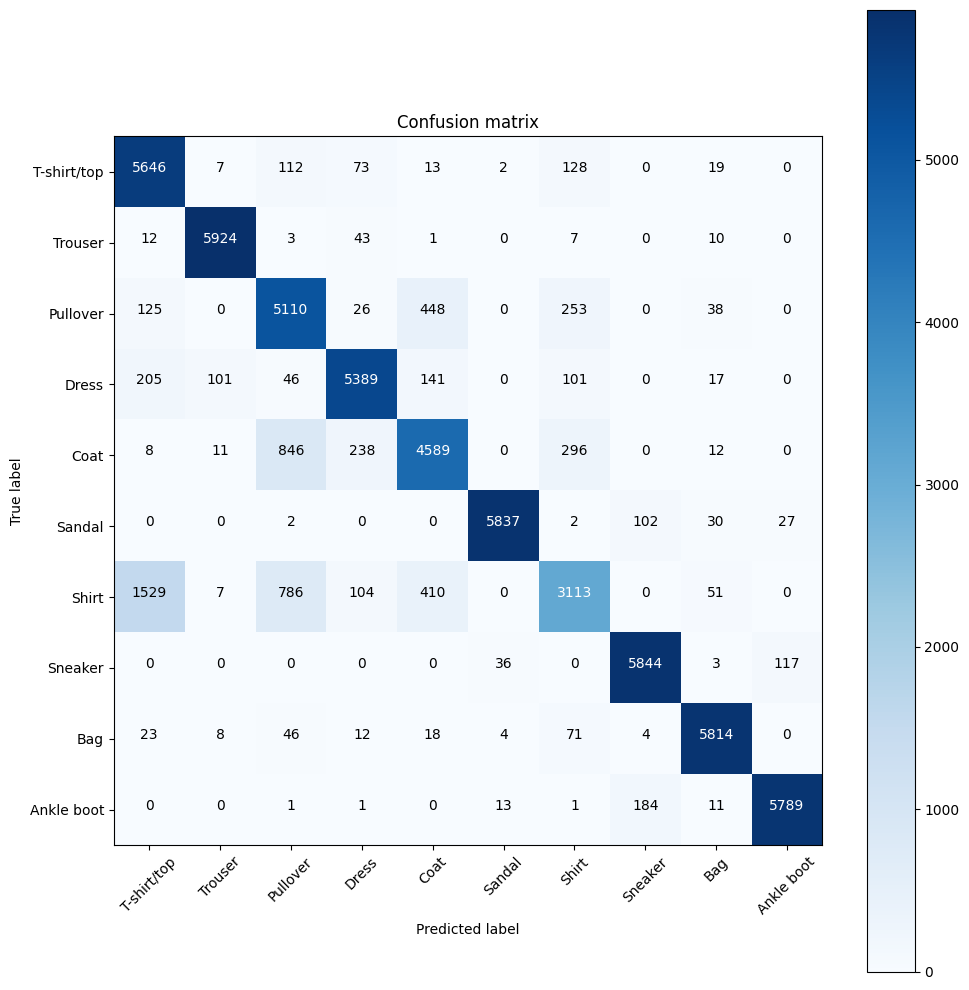

In [72]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, train_set.classes)

In [73]:
from torch.utils.tensorboard import SummaryWriter

In [74]:
tb = SummaryWriter()

In [76]:
network = Network()
images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb.add_image('images', grid)
tb.add_graph(network, images)
tb.close()

In [79]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb = SummaryWriter()
tb.add_image('images', grid)
tb.add_graph(network, images)

for epoch in range(1):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    tb.add_scalar('Loss', total_loss, epoch)
    tb.add_scalar('Number Correct', total_correct, epoch)
    tb.add_scalar('Accuracy', total_correct / len(train_set), epoch)

    tb.add_histogram('conv1.bias', network.conv1.bias, epoch)
    tb.add_histogram('conv1.weight', network.conv1.weight, epoch)
    tb.add_histogram(
        'conv1.weight.grad'
        ,network.conv1.weight.grad
        ,epoch
    )

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

tb.close()

epoch 0 total_correct: 46777 loss: 347.8920542001724


In [80]:
from itertools import product

In [81]:
parameters = dict(
    lr = [.01, .001]
    ,batch_size = [100, 1000]
    ,shuffle = [True, False]
)

In [83]:
param_values = [v for v in parameters.values()]

In [84]:
for lr, batch_size, shuffle in product(*param_values): 
    print (lr, batch_size, shuffle)

0.01 100 True
0.01 100 False
0.01 1000 True
0.01 1000 False
0.001 100 True
0.001 100 False
0.001 1000 True
0.001 1000 False


In [85]:
from collections import OrderedDict
from collections import namedtuple
from itertools import product

In [86]:
class RunBuilder():
    @staticmethod
    def get_runs(params):

        Run = namedtuple('Run', params.keys())

        runs = []
        for v in product(*params.values()):
            runs.append(Run(*v))

        return runs

In [87]:
params = OrderedDict(
    lr = [.01, .001]
    ,batch_size = [1000, 10000]
)

In [89]:
runs = RunBuilder.get_runs(params)

In [90]:
runs

[Run(lr=0.01, batch_size=1000),
 Run(lr=0.01, batch_size=10000),
 Run(lr=0.001, batch_size=1000),
 Run(lr=0.001, batch_size=10000)]

In [91]:
for run in RunBuilder.get_runs(params):
    comment = f'-{run}'

In [92]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from IPython.display import display, clear_output
import pandas as pd
import time
import json

from itertools import product
from collections import namedtuple
from collections import OrderedDict

In [112]:
class RunManager():

    def __init__(self):

        self.epoch_count = 0
        self.epoch_loss = 0
        self.epoch_num_correct = 0
        self.epoch_start_time = None

        self.run_params = None
        self.run_count = 0
        self.run_data = []
        self.run_start_time = None

        self.network = None
        self.loader = None
        self.tb = None

    def begin_run(self, run, network, loader):

        self.run_start_time = time.time()

        self.run_params = run
        self.run_count += 1

        self.network = network
        self.loader = loader
        self.tb = SummaryWriter(comment=f'-{run}')

        images, labels = next(iter(self.loader))
        grid = torchvision.utils.make_grid(images)

        self.tb.add_image('images', grid)
        self.tb.add_graph(self.network, images)

    def end_run(self):
        self.tb.close()
        self.epoch_count = 0

    def begin_epoch(self):
        self.epoch_start_time = time.time()

        self.epoch_count += 1
        self.epoch_loss = 0
        self.epoch_num_correct = 0

    def end_epoch(self):

        epoch_duration = time.time() - self.epoch_start_time
        run_duration = time.time() - self.run_start_time

        loss = self.epoch_loss / len(self.loader.dataset)
        accuracy = self.epoch_num_correct / len(self.loader.dataset)

        self.tb.add_scalar('Loss', loss, self.epoch_count)
        self.tb.add_scalar('Accuracy', accuracy, self.epoch_count)

        for name, param in self.network.named_parameters():
            self.tb.add_histogram(name, param, self.epoch_count)
            self.tb.add_histogram(f'{name}.grad', param.grad, self.epoch_count)

        results = OrderedDict()
        results["run"] = self.run_count
        results["epoch"] = self.epoch_count
        results['loss'] = loss
        results["accuracy"] = accuracy
        results['epoch duration'] = epoch_duration
        results['run duration'] = run_duration
        for k,v in self.run_params._asdict().items(): results[k] = v
        self.run_data.append(results)

        df = pd.DataFrame.from_dict(self.run_data, orient='columns')

        clear_output(wait=True)
        display(df)


    def track_loss(self, loss, batch):
        self.epoch_loss += loss.item() * batch[0].shape[0]

    def track_num_correct(self, preds, labels):
        self.epoch_num_correct += self.get_num_correct(preds, labels)

    def get_num_correct(self, preds, labels):
        return preds.argmax(dim=1).eq(labels).sum().item()

    def save(self, fileName):

        pd.DataFrame.from_dict(
            self.run_data, orient='columns'
        ).to_csv(f'{fileName}.csv')

        with open(f'{fileName}.json', 'w', encoding='utf-8') as f:
            json.dump(self.run_data, f, ensure_ascii=False, indent=4)

In [115]:
params = OrderedDict(
    lr = [.01]
    ,batch_size = [1000, 2000]
    ,shuffle = [True, False]
)
m = RunManager()

network = Network()
for run in RunBuilder.get_runs(params):

  loader = torch.utils.data.DataLoader(train_set, run.batch_size)
  optimizer = optim.Adam(network.parameters(), lr=run.lr)
   
  m.begin_run(run, network, loader)

  for epoch in range(5):
    m.begin_epoch()
    for batch in loader:
        images, labels = batch
        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        m.track_loss(loss, batch)
        m.track_num_correct(preds,labels)
    m.end_epoch()
  m.end_run()
m.save('results')


,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,0.955332,0.635717,4.844756,5.252299,0.01,1000,True
1,1,2,0.506298,0.808950,4.789494,10.180070,0.01,1000,True
2,1,3,0.421143,0.844817,4.829144,15.115272,0.01,1000,True
3,1,4,0.377582,0.860783,4.861398,20.023288,0.01,1000,True
4,1,5,0.340051,0.873833,4.890075,25.042906,0.01,1000,True
5,2,1,0.430005,0.844083,4.836692,5.258325,0.01,1000,False
6,2,2,0.316770,0.882850,4.937502,10.266130,0.01,1000,False
7,2,3,0.292939,0.890967,4.940154,15.332455,0.01,1000,False
8,2,4,0.276157,0.896833,5.033108,20.540329,0.01,1000,False
9,2,5,0.264346,0.900550,4.928415,25.551976,0.01,1000,False
